# KNearestNeighbors 🦆

> If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Klasifikacija karcinoma 

Koristimo skup podataka [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).
Skup podataka se sastoji od 33 atributa. Vrednosti atributa su izračunati sa digitalizovanih slika mase, koje opisuju karakteristike ćelija prikazanih na slici. Vrednost atributa **diagnosis** sadrži informaciju o tome da li je u pitanju benigni ili maligni tumor.


## Učitavanje i analiza skupa podataka

In [2]:
data = pd.read_csv('data.csv')
data.columns # nazivi atributa

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Rad sa nedostajućim vrednostima
U skupu postoje nedostajuće vrednosti. Detaljnijom proverom po kolonama, vidimo da se one javljaju samo u koloni _Unnamed: 32_, kao i da su zapravo sve vrednosti u ovoj koloni NaN. Iz tog razloga smatramo da je ovo greška i kolonu izbacujemo iz skupa.

In [4]:
data.isna().any().any() # da li u skupu postoje nedostajuće vrednosti

True

In [5]:
data.isna().any() # u kojim kolonama se javljaju nedostajuće vrednosti

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
data['Unnamed: 32'].isna().all() # Sve vrednosti u koloni 'Unnamed: 32' su NaN

True

In [7]:
data.drop('Unnamed: 32', axis=1, inplace=True) # izbacujemo kolonu 'Unnamed: 32' iz skupa

In [8]:
data.drop('id', axis=1, inplace=True)

### Podela na ulazne i ciljne atribute
Informacija o vrsti tumora se nalazi u koloni _diagnosis_ (ciljni atribut), dok se ostali atributi koriste za predikciju (ulazni atributi).

In [9]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)
feature_names = X.columns
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Vrednosti u Y (klasa) je M - maligni i B - benigni tumor. Dakle, rešavamo problem _binarne klasifikacije_.

In [10]:
Y.unique()

array(['M', 'B'], dtype=object)

### Provera balansiranosti klasa

Na osnovu histograma vidimo da se u skupu podataka nalazi 212 instanci malignog i 357 instanci benignog tumora.
Primećujemo blagu nebalansiranost (38%-62%).

_NAPOMENA_: Na narednim časovima ćemo pokazati metode rada sa nebalansiranim klasama.

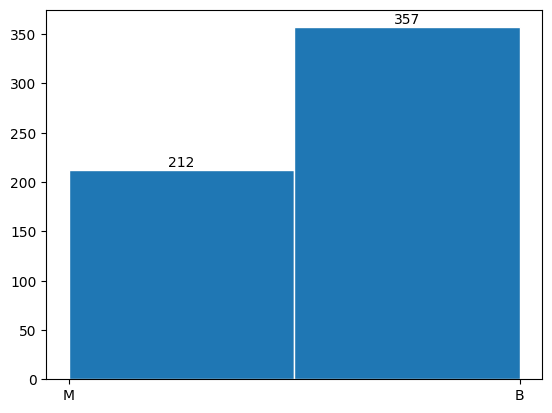

In [11]:
import numpy as np

freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()


Tipično, binarna klasifikacija sadrži jednu klasu koja predstavlja _normalno stanje_ i drugu koja predstavlja _abnormalno stanje_.
U našem primeru, benigni tumor predstavlja normalno stanje, a maligni abnormalno. 
Klasi koja predstavlja normalno stanje se dodeljuje oznaka **0**, dok se drugoj klasi dodeljuje oznaka **1**.

In [12]:
Y.replace("B", 0, inplace=True)
Y.replace("M", 1, inplace=True)

### Analiza ulaznih atributa

Na osnovu statistika kolona možemo primetiti da se vrednosti nalaze u različitim rasponima.

Pitanja na koja bi trebalo da odogovorimo su:
1. Da li je potrebno izvršiti normalizaciju prilikom korišćenja KNN? (Da, zašto?)
2. Da li je KNN robusan na autlajere? (Ne, zašto?)

### Rad sa elementima van granica

Pošto želimo da noramlizujemo podatke na raspon [0, 1], prvo je potrebno proveriti da li postoje elementi van granica, i kako bi oni uticali na normalizaciju naših podataka (Pogledajte svesku o normalizaciji).
Takođe, KNN je osetljiv na elemente van granica, što predstavlja još jedan motiv provere.


#### Provera da li u skupu postoje elementi van granica

Postoji veliki broj metoda za detekciju elemenata van granica:
* Boxplot 
* Histogram
* Mean and Standard Deviation
* IQR (Inter Quartile Range)
* Z-score
* Percentile

U ovom zadatku ćemo iskoristiti IQR. Za domaći istražite ostale metode.

IQR računa interkvartlano rastojanje. Kao povratnu vrednost čuvamo broj autlajera koji su manji od donje granice ili veći, kao i procenat podataka po kolonama koji su van granica.

In [13]:
def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:

        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr


❓ _Pitanje_:  Da li proveru elemenata van granica i normalizaciju vršimo pre podele na trening i test skup?

**Nakon, inače smo kompromitovali test skup.**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [15]:
IQR(X_train, feature_names)

,lower,min,num_lower,upper,max,num_upper,percantage
radius_mean,5.580000,6.981000,0,21.900000,28.11000,14,2
texture_mean,7.725000,9.710000,0,30.245000,39.28000,7,1
perimeter_mean,31.775000,43.790000,0,147.495000,188.50000,13,2
area_mean,-123.300000,143.500000,0,1326.300000,2501.00000,25,4
smoothness_mean,0.057975,0.052630,1,0.133695,0.16340,5,1
compactness_mean,-0.033300,0.019380,0,0.228620,0.34540,16,3
concavity_mean,-0.122150,0.000000,0,0.282410,0.42680,18,3
concave points_mean,-0.060225,0.000000,0,0.154535,0.20120,10,2
symmetry_mean,0.111200,0.106000,1,0.246400,0.30400,14,3
fractal_dimension_mean,0.045070,0.049960,0,0.078750,0.09744,15,3


Dakle, možemo zaključiti da postoje autlajeri, ali ih neam mnogo i vrednosti ne odskaču previše.

#### Metode za rad sa autlajerima

Ukoliko smatramo da će autlajeri previše uticati na model možemo primeniti više tehnika:
* Uklanjanje autlajera 
* Odsecanje - svi autlajeri se slikaju u granične vrednosti
* Postavljanje na NaN + primena neke metode za rad sa nedostajućim vrednostima

🤔 **_DOMAĆI_**: Primenite neku od ovih tehnika i uporedite sa modelom koji se dobija kada se originalne vrednosti autlajera ne menjaju:
 - Koja od tehnika Vam se čini najbolja?
 - Sa obzirom na to da nema mnogo autlajera, čini se da bi sve tehnike mogle da budu odgovarajuće.
 - Pošto radimo sa atributima veličina, prečnik, simetrija itd. mase za koju se vrši klasifikacija u benigni/maligni karcinom, možda baš ekstremne vrednosti signaliziraju postojanje maligniteta? 

#### Normalizacija
Za normalizaciju ćemo iskoristiti MinMaxScaler
Vrednosti min i max ćemo odrediti na osnovu trening skupa, a zatim primeniti transformaciju na test i trening skup.
Ponovo naglašavamo, **neophodno je da podelu na test i trening izvršimo pre normalizacije!**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Pomoćne funkcije
Pošto ćemo trenirate više modela, pravimo pomoćne funkcije za pisanje izveštaja.

In [17]:
# !pip install termcolor
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print("---------------------------------------------------------------------------------")
    

## KNN


In [18]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [19]:
knn.fit(X_train, Y_train) # treninranje modela

KNeighborsClassifier()

Model na trening skupu ima tačnost **0.98**.

In [20]:
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       267
           1       0.99      0.96      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  266    1
M    7  152
---------------------------------------------------------------------------------


Izveštaj klasifikacije nad test skupom nam daje informaciju da je tačnost na test skupu **0,97**.

_Pitanje1_: Da li je došlo do preprilagođavanja?

_Pitanje2_: Koju vrstu grešaka u klasifikaciji želimo da minimizujemo? (Da li nam je bitnije da je FP ili FN malo?)


In [21]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
    B   M
B  89   1
M   3  50
---------------------------------------------------------------------------------


Trenutni model, iako ima visoku preciznost, pravi veći broj grešaka prvog reda, i zato ćemo pokušati da ga unapredimo, promenom hiper-parametara.

## Podešavanje hiper-parametara modela

Hiper-paramtri su parametri koji se ne uče tokom treniranja. U scikit-learn biblioteci, hiper parametri se prosleđuju kao argumenti konstrukoru.

Želimo da promenimo hiper-parametre našeg modela, ali ne znamo koja kombinacija parametara će nam dati najbolji model.

### GridSearchCV 


U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [22]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

#estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6)
estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)


In [23]:
estimator.fit(X_train, Y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.986 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.915 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.915 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.930 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.986 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.930 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.944 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.930 total time=   0.0s
[CV 6/6] END n_neigh

[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.930 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.986 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=2, weights=uniform;, score=0.901 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=2, weights=uniform;, score=0.915 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=2, weights=uniform;, score=0.930 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=2, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=distance;, score=0.986 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=2, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=2, weights=distance;, score=0.901 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=2, weights=distance;, score=0.915 total time=   0.0

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

Možemo pogledati koja je najbolja kombinacija parametara

In [24]:
estimator.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

Kao i najbolji score

In [25]:
estimator.best_score_

0.9624413145539906

In [26]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159
---------------------------------------------------------------------------------


In [27]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.96      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
    B   M
B  90   0
M   2  51
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate cross validacije.

In [28]:
estimator.cv_results_

{'mean_fit_time': array([0.00133359, 0.00166738, 0.00166651, 0.00116718, 0.00166535,
        0.00099993, 0.00099178, 0.00133407, 0.00133137, 0.00100048,
        0.0011671 , 0.00100005, 0.00133336, 0.00102107, 0.00166674,
        0.001526  , 0.0011667 , 0.0011667 , 0.00150379, 0.001333  ,
        0.00149981, 0.00133224, 0.00116694, 0.00149743, 0.00100013,
        0.00100021, 0.00099977, 0.00116181, 0.00116726, 0.00116658,
        0.00133316, 0.00133387]),
 'std_fit_time': array([4.70865281e-04, 4.71286530e-04, 7.46564035e-04, 3.72597866e-04,
        4.71962530e-04, 4.56536821e-07, 1.85397169e-05, 4.71793075e-04,
        4.69404172e-04, 8.33518384e-07, 3.73272984e-04, 6.98502693e-07,
        4.71286470e-04, 4.63110659e-05, 7.46350838e-04, 5.28715168e-04,
        3.72917875e-04, 3.72704668e-04, 5.03440475e-04, 4.71623388e-04,
        4.99884408e-04, 4.70558542e-04, 3.73238524e-04, 5.03080333e-04,
        5.04198771e-07, 4.22404043e-07, 2.63581657e-07, 3.61668987e-04,
        3.72989019e-0

##### n_neighbors = 1
Ukoliko klasifikaciju vršimo na osnovu 1 najbližeg suseda, kakav model dobijamo?
Naravno, preciznost na trening skupu je **1** (jer je svaka instanca sama sebi najbliži sused).
Naš model se preprilagodio podacima!

In [29]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)
report(model, X_train, Y_train)
report(model, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159
---------------------------------------------------------------------------------
Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision  

##### n_neighbors = veličina trening skupa
Ako je broj suseda na osnovu kojih vršimo klasifikaciju jednak veličini celog skupa za trening, kakav model dobijamo?
Svim instancama se dodeljuje brojnija klasa.

In [30]:
model = KNeighborsClassifier(n_neighbors=X_train.shape[0])
model.fit(X_train, Y_train)
report(model, X_train, Y_train)
report(model, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       267
           1       1.00      0.00      0.00       159

    accuracy                           0.63       426
   macro avg       0.81      0.50      0.39       426
weighted avg       0.77      0.63      0.48       426

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
     B  M
B  267  0
M  159  0
---------------------------------------------------------------------------------
Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    reca

## Ansambli
Jedan od najuspešnijih pristupa mašinskom učenju su ansambli (eng. ensemble) - skupovi većeg broja modela koji zajednički donose odluke.
Ključni ideja je da veći broj modela konstruistan na adekvatan način daje bolju preciznost od samo jednog modela.

In [31]:
from sklearn.ensemble import BaggingClassifier

baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train, Y_train)

report(baggingKnn, X_train, Y_train)
report(baggingKnn, X_test, Y_test, "test")

    

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  266    1
M    8  151
---------------------------------------------------------------------------------
Classification report for model BaggingClassifier on test data
---------------------------------------------------------------------------------
              precision    recall 

## Poređenje dobijenih modela

Napravili smo više modela, sada je pitanje koji od njih najbolje rešava problem klasifikacije. Naravno, ne možemo zaključiti samo na osnovu preciznosti modela. 
Za poređenje koristimo **ROC krivu**.

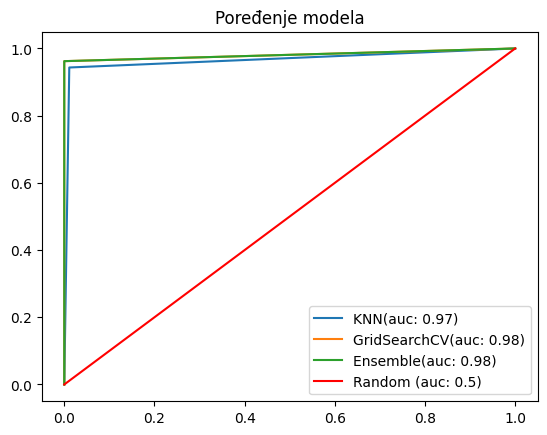

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_, baggingKnn]
model_names = ['KNN', 'GridSearchCV', 'Ensemble']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

🤔 Dobili smo iste vrednosti za Ansambl i model za koji smo podesili parametre. Koji izabrati?
Koje su prednosti/mane ovih modela?

### Za vežbu:
* Pokušajte da poboljšate model finijim podešavanjem parametara
* Uporediti dobijene modele sa modelima zasnovanim na Stablima odlučivanja. Koje su prednosti/mane knn u odnosu na stabla odlučivanja?